
 The length of the file is: 6930000 as expected from 15000 samples x 462 lines

 The length of the time array is: 10000


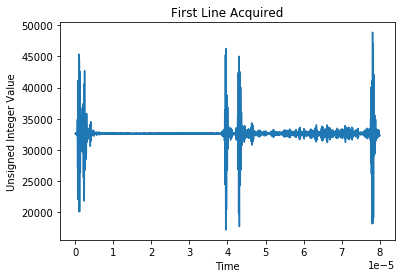

In [5]:
%matplotlib inline
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt

#we use a simple open command for the file (basic Python)
f = open('UltrasoundSampleSignal.dat','rb')
#we read it using a numpy (therefore the np.) command that allows direct reading from file into an array
AllSignal = np.fromfile(f,count=-1,dtype=np.uint16)
#to verify the size of the file I am printing here the lenght of that array 
print('\n The length of the file is: ' + str(len(AllSignal)) + ' as expected from 15000 samples x 462 lines')
#we will now populate an array for the time which we now is 1/125MHz step for a total of 15000
x=np.arange(0,10000/125e6,1/125e6)  #start,stop,step
print('\n The length of the time array is: ' + str(len(x)) )
#now we plot only the first line acquired (15000 samples)
plt.plot(x,AllSignal[:10000])
plt.title('First Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
f.close()

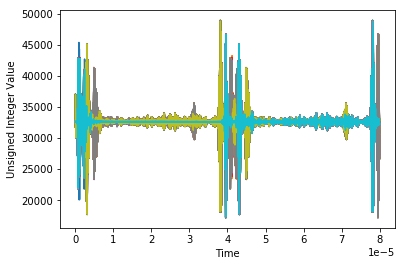

In [35]:
#we plot the 100 lines And chages these value and findout how it affect our signal in future.
totlines=np.arange(100)
for index in totlines:
    Signal=AllSignal[index*10000:(index+1)*10000]
    plt.plot(x,AllSignal[index*10000:(index+1)*10000])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

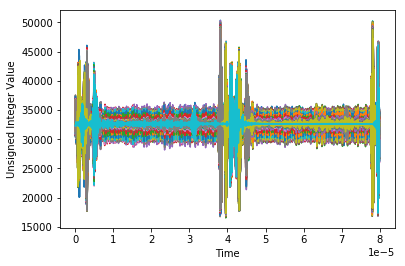

In [14]:
totlines=np.arange(200)
for index in totlines:
    Signal=AllSignal[index*10000:(index+1)*10000]
    plt.plot(x,AllSignal[index*10000:(index+1)*10000])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    
    

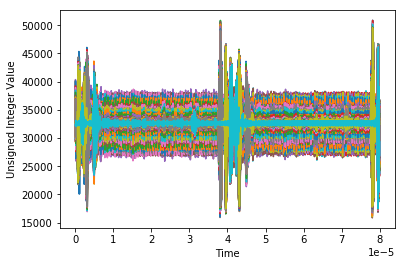

In [15]:
totlines=np.arange(320)
for index in totlines:
    Signal=AllSignal[index*10000:(index+1)*10000]
    plt.plot(x,AllSignal[index*10000:(index+1)*10000])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

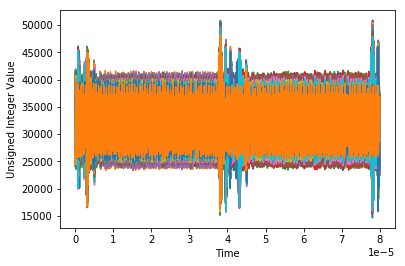

In [16]:
totlines=np.arange(462)
for index in totlines:
    Signal=AllSignal[index*10000:(index+1)*10000]
    plt.plot(x,AllSignal[index*10000:(index+1)*10000])
    plt.xlabel('Time')
    plt.ylabel('Unsigned Integer Value')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

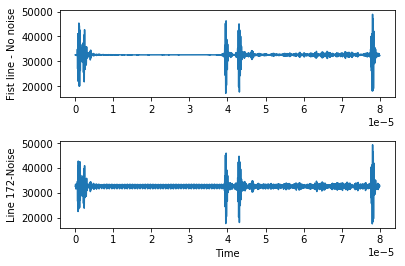

In [19]:
#The first line is clear
FirstLine=AllSignal[:10000]

#But some lines are very noisy, for instance line 172
NoisyLine=AllSignal[174*10000:(174+1)*10000]

plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,FirstLine)
plt.ylabel('Fist line - No noise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.subplot(212)
plt.plot(x,NoisyLine)
plt.xlabel('Time')
plt.ylabel('Line 172-Noise')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))



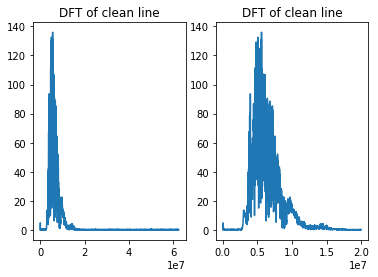

In [24]:
#we first eliminate dc
dataF=FirstLine-np.mean(FirstLine)
L=len(dataF)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/10000)
Y=np.fft.fft(dataF)
PyyClean=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, PyyClean[:5000])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
#Zooming into just less than 20MHz
inx=np.where(f>20e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], PyyClean[:inx[0]])
plt.title('DFT of clean line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

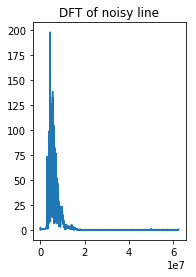

In [32]:
#now we repeat for the noisy line
#we first eliminate dc
dataN=NoisyLine-np.mean(NoisyLine)
L=len(dataN)
#the frequencies after fft will be between 0 and 1/2 of the sampling frequency
f=np.arange(0,125e6/2,125e6/10000)
Y=np.fft.fft(dataN)
PyyNoisy=abs(Y)/L
#note: we are showing just L/2 elements which are the positive frequencies and we are normalizing
plt.subplot(121)
plt.plot(f, PyyNoisy[:5000])
plt.title('DFT of noisy line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(1,1))


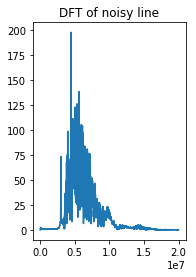

In [31]:
#Zooming into just less than 15MHz
inx=np.where(f>20e6)
inx=inx[0]
plt.subplot(121) #using 121 instead of 122(1,2,2)
plt.plot(f[:inx[0]], PyyNoisy[:inx[0]])
plt.title('DFT of noisy line')
plt.ticklabel_format(style='sci', axis='x', scilimits=(1,1))

In [33]:
Cleansignal=np.amax(PyyClean)
print('Noise Thresold is : '+str(Cleansignal))

Noise Thresold is : 135.98197218


Noise Thresold is : 135.98197218
Total number of Line there amplitude above noise threshold0
Total number of Line there amplitude above noise threshold3
Total number of Line there amplitude above noise threshold6
Total number of Line there amplitude above noise threshold9
Total number of Line there amplitude above noise threshold12
Total number of Line there amplitude above noise threshold15
Total number of Line there amplitude above noise threshold18
Total number of Line there amplitude above noise threshold21
Total number of Line there amplitude above noise threshold24
Total number of Line there amplitude above noise threshold27
Total number of Line there amplitude above noise threshold30
Total number of Line there amplitude above noise threshold33
Total number of Line there amplitude above noise threshold36
Total number of Line there amplitude above noise threshold39
Total number of Line there amplitude above noise threshold42
Total number of Line there amplitude above noise thresho

Total number of Line there amplitude above noise threshold340
Total number of Line there amplitude above noise threshold341
Total number of Line there amplitude above noise threshold342
Total number of Line there amplitude above noise threshold343
Total number of Line there amplitude above noise threshold344
Total number of Line there amplitude above noise threshold345
Total number of Line there amplitude above noise threshold346
Total number of Line there amplitude above noise threshold347
Total number of Line there amplitude above noise threshold348
Total number of Line there amplitude above noise threshold349
Total number of Line there amplitude above noise threshold350
Total number of Line there amplitude above noise threshold351
Total number of Line there amplitude above noise threshold352
Total number of Line there amplitude above noise threshold353
Total number of Line there amplitude above noise threshold354
Total number of Line there amplitude above noise threshold355
Total nu

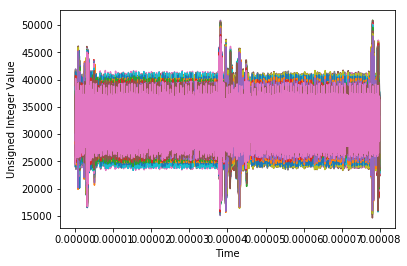

In [34]:
Cleansignal=np.amax(PyyClean)
print('Noise Thresold is : '+str(Cleansignal))
p=np.arange(0,10000/125e6,1/125e6)
totlines=np.arange(462)
i=0
for index in totlines:
    ladata=AllSignal[index*10000:(index+1)*10000]-np.mean(AllSignal[index*10000:(index+1)*10000])
    L=len(ladata)
    Y=np.fft.fft(ladata)
    Pyy=abs(Y)/L
    Amp=np.amax(Pyy)   
    if Amp>135.98:     
        
        i=i+1
        Signal=AllSignal[index*10000:(index+1)*10000]
        plt.plot(p,AllSignal[index*10000:(index+1)*10000]) 
        plt.xlabel('Time')
        plt.ylabel('Unsigned Integer Value')
        plt.ticklabel_format(style='sci', axis='b', scilimits=(0,0))
        print "Total number of Line there amplitude above noise threshold" +str(index)   
        
print "So,Total Number of Noise lines that we have  " + str(i)